In [3]:
#Importing standard libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
pwd

'D:\\work\\mining\\Notes\\Notebook'

# EIGENFACES

In [5]:
#Loading LFW dataset from SKlearn
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=150)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'George W Bush']
(766, 62, 47)


In [31]:
faces

{'data': array([[109.333336 ,  99.666664 ,  85.333336 , ...,  88.666664 ,
          82.333336 ,  72.       ],
        [110.666664 , 151.       , 187.66667  , ..., 170.66667  ,
         167.33333  , 163.       ],
        [119.666664 , 142.66667  , 145.66667  , ...,  81.333336 ,
          59.666668 ,  25.666666 ],
        ...,
        [ 97.       ,  88.666664 ,  75.666664 , ...,   8.       ,
           6.3333335,   8.       ],
        [154.       , 148.33333  , 139.33333  , ...,  16.333334 ,
          19.333334 ,  23.666666 ],
        [ 91.       ,  95.666664 , 100.333336 , ...,  18.666666 ,
          34.333332 ,  43.333332 ]], dtype=float32),
 'images': array([[[109.333336 ,  99.666664 ,  85.333336 , ...,  75.666664 ,
          114.       , 154.33333  ],
         [104.       ,  91.       ,  82.       , ...,  65.       ,
           96.666664 , 141.66667  ],
         [103.       ,  92.       ,  85.333336 , ...,  69.       ,
           77.666664 , 121.       ],
         ...,
         [162.

In [32]:
X = faces.data
Y = faces.target

In [33]:
print(X.shape)
print(Y.shape)

(766, 2914)
(766,)


In [12]:
X

array([[109.333336 ,  99.666664 ,  85.333336 , ...,  88.666664 ,
         82.333336 ,  72.       ],
       [110.666664 , 151.       , 187.66667  , ..., 170.66667  ,
        167.33333  , 163.       ],
       [119.666664 , 142.66667  , 145.66667  , ...,  81.333336 ,
         59.666668 ,  25.666666 ],
       ...,
       [ 97.       ,  88.666664 ,  75.666664 , ...,   8.       ,
          6.3333335,   8.       ],
       [154.       , 148.33333  , 139.33333  , ...,  16.333334 ,
         19.333334 ,  23.666666 ],
       [ 91.       ,  95.666664 , 100.333336 , ...,  18.666666 ,
         34.333332 ,  43.333332 ]], dtype=float32)

In [18]:
X.shape

(2232124, 1)

In [19]:
X = X.reshape(-1,1)

In [20]:
X

array([[109.333336],
       [ 99.666664],
       [ 85.333336],
       ...,
       [ 18.666666],
       [ 34.333332],
       [ 43.333332]], dtype=float32)

In [21]:
y = faces.target

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

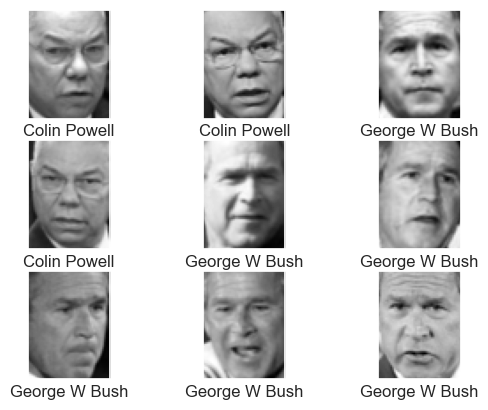

In [28]:
startindex = 10
fig, axi = plt.subplots(3, 3)
for i, axi in enumerate(axi.flat):
    axi.imshow(faces.images[i+startindex], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i+startindex]])

In [34]:
model = LogisticRegression(max_iter = 10000000)
from sklearn.svm import SVC # "Support vector classifier"
#model = SVC(kernel='linear')

In [35]:
model.fit(X,y)

LogisticRegression(max_iter=10000000)

In [36]:
predictedfaces = model.predict(X)

In [37]:
confusion_matrix(y,predictedfaces)

array([[236,   0],
       [  0, 530]], dtype=int64)

In [38]:
model = SVC(kernel='linear')
model.fit(X,y)
predictedfaces = model.predict(X)
confusion_matrix(y,predictedfaces)

array([[236,   0],
       [  0, 530]], dtype=int64)

In [39]:
model = SVC(kernel='rbf')
model.fit(X,y)
predictedfaces = model.predict(X)
confusion_matrix(y,predictedfaces)

array([[224,  12],
       [  1, 529]], dtype=int64)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 310323)

In [41]:
model = LogisticRegression(max_iter = 1000000)
from sklearn.svm import SVC # "Support vector classifier"
#model = SVC(kernel='linear')

In [42]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000000)

In [43]:
predictedfacestrain = model.predict(X_train)
predictedfacestest = model.predict(X_test)

In [44]:
confusion_matrix(predictedfacestrain,y_train)

array([[192,   0],
       [  0, 420]], dtype=int64)

In [45]:
confusion_matrix(predictedfacestest,y_test)

array([[ 40,   8],
       [  4, 102]], dtype=int64)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pca.fit(faces.data)

PCA(n_components=20)

In [47]:
pcadata = pca.transform(faces.data)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(pcadata, y, test_size=0.2,shuffle=False)

In [49]:
model = LogisticRegression()
from sklearn.svm import SVC # "Support vector classifier"
#model = SVC(kernel='linear')

In [50]:
model.fit(X_train,y_train)

LogisticRegression()

In [51]:
predictedfacestrain = model.predict(X_train)
predictedfacestest = model.predict(X_test)

In [52]:
confusion_matrix(predictedfacestrain,y_train)

array([[160,  17],
       [ 27, 408]], dtype=int64)

In [53]:
confusion_matrix(predictedfacestest,y_test)

array([[ 37,   5],
       [ 12, 100]], dtype=int64)

In [54]:
pcadata.shape

(766, 20)

In [55]:
62*47

2914

In [ ]:
faces.images[0].shape

In [ ]:
faces.images.reshape

In [ ]:
faces.data.shape

In [ ]:
faces.images[0][54]

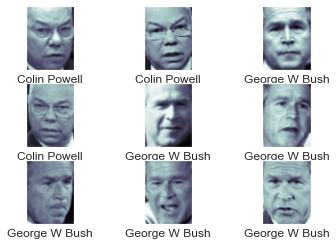

In [92]:
#Displaying a few images with labels
startindex = 10
fig, axi = plt.subplots(3, 3)
for i, axi in enumerate(axi.flat):
    axi.imshow(faces.images[i+startindex], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i+startindex]])